<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week10_NonlinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10
# Nonlinear SVM

In many cases, it is not the best way to use linear boundaries to separate different classes of data points. With a simple trick of feature transformation, we can have the SVM method learn non-linear decision boundaries.

Consider the following dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

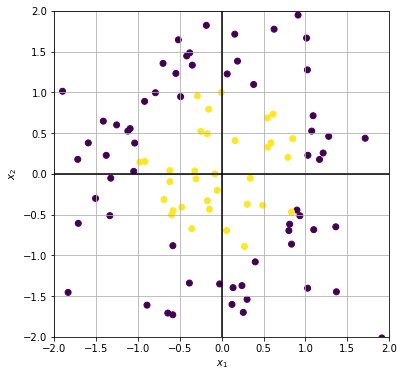

In [7]:
m = 100  # size of data set
data = pd.DataFrame(index=np.arange(m))
# input features: x1, x2
data['x1'] = np.random.randn(m)
data['x2'] = np.random.randn(m)
# target value: y
# y = 0 if (x1, x2) is inside the unit circle
# y = 1 if (x1, x2) is outside of the unit circle
data['y'] = (data['x1'] ** 2 + data['x2'] ** 2 < 1).astype(int)

# plot the data
plt.figure(figsize=(6, 6))
plt.scatter(data['x1'],
            data['x2'],
            c=data['y'])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## SVM with Polynomial Kernel
This dataset is clearly not linear separable. Next, add two new features $x_1^2$ and $x_2^2$.

In [8]:
# add two new features: x1 squared and x2 squared
data['x1^2'] = data['x1'] ** 2
data['x2^2'] = data['x2'] ** 2
data.head()

,x1,x2,y,x1^2,x2^2
0,-0.518771,1.644630,0,0.269123,2.704809
1,0.057539,-0.693835,1,0.003311,0.481407
2,0.155179,1.714071,0,0.024080,2.938040
3,0.134926,-1.394434,0,0.018205,1.944447
4,1.074382,0.525230,0,1.154298,0.275867


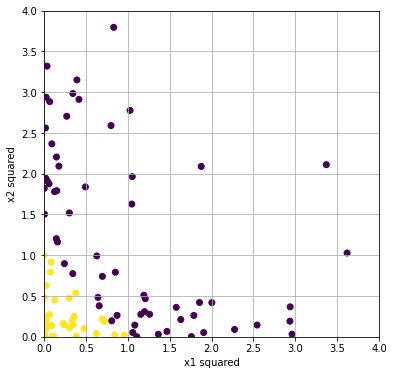

In [10]:
# Visualize the data with new features
plt.figure(figsize=(6, 6))
plt.scatter(data['x1^2'],
            data['x2^2'],
            c=data['y'])
plt.grid(True, which='both')
plt.xlabel('x1 squared')
plt.ylabel('x2 squared')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

In [11]:
# Train an SVM model with polynomial features of degree 2
from sklearn.svm import SVC # For regression use SVR
model = SVC(C=10,
            kernel='poly', # Another popular choice is "RBF"
            degree=2,
            coef0=0)

model.fit(data[['x1', 'x2']], data['y'])

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

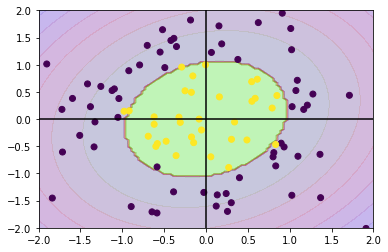

In [12]:
# plot the decision boundary
x1s = np.linspace(-2, 2, 100)
x2s = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
y_pred = model.predict(X).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
y_decision = model.decision_function(X).reshape(x1.shape)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

## Choice of kernels
Consider a dataset with $m$ examples, each having $n$ features.
1. If $m < n$, then it is advised to use no kernel (sometimes called *linear kernel*) to avoid overfitting.
2. If $m$ is slightly larger than $n$, use a kernel (Gaussian RBF kernel is generally better than polynomial kernel in practice)
3. If $m$ is extremely large, it is usually a good idea to create new features.

Other choices of kernels: 
- sigmoid kernel (equivalent to logistic regression)
- string kernel (for text data)
- define new kernels

## The Kernel Trick

Adding extra features may dramatically increase the computational complexity. For example, consider a polynomial kernel with degree 3 and set coef0 = 1. This means to transform each input feature x as:

$(x+1)^3 = x^3 + 3x^2 + 3x + 1$,

and two new features 'x^3', 'x^2' are added to the model. If the dataset is very complex and a large degree is needed, the model will create a huge number of features, making the model too slow.

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the *kernel trick*, which makes it possible to handle extra features without actually having to add them. As a result, the exponential explosion of complexity is avoided since new features are not actually added.